In [15]:
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np
from decimal import Decimal

In [16]:
pd.reset_option('display.float_format')


Reading Water Level At Galchi and Chumlingtar

In [17]:
wl_galchi_dec10_dec12=pd.read_csv('Dataset/Galchi_2024-12-10 to 2024-12-12.csv')
wl_buddhi_dec10_dec12=pd.read_csv('Dataset/BudhiGandaki_2024-12-10 to 2024-12-12.csv')

# wl_galchi_dec10_dec12=pd.read_csv('Dataset/wl_galchi_test.csv',float_precision='high')
# wl_buddhi_dec10_dec12=pd.read_csv('Dataset/wl_khari_test.csv',float_precision='high')
wl_siurenitar_dec_10_dec15=pd.read_csv('Dataset/Siurenitar_2024-12-10 to 2024-12-15.csv')


Handling Null Values in Original Dataset Via Interpolation

In [18]:
def handle_null_values(df):
    #for the first null value with no preceeding value.
    df['value']=df['value'].fillna(method='bfill')
    #since water levels are continuous and expected to follow a natural trend we interpolate null values
    df['value']=df['value'].interpolate(method='linear') 

Handle Obvious Outliers

In [19]:
def handle_outliers(df):
    min_value=50
    max_value=10000000
    # Remove rows where the specific column's value is below the minimum or above the maximum threshold
    df = df[(df['value'] >= min_value) & (df['value'] <= max_value)].copy() 
    # print(df.head())
    
    return df

Converting to relevant data types:

In [20]:
def preprocess_data(df):   
    df['dateTime']=pd.to_datetime(df['dateTime'])
    df['value']=pd.to_numeric(df['value'],errors='coerce')
    df.set_index('dateTime',inplace=True)
    df=handle_outliers(df)
    handle_null_values(df)
    return df


Preprocess Data

In [21]:
    #Only the original df should be preprocessed,else there will be error
wl_galchi_dec10_dec12=preprocess_data(wl_galchi_dec10_dec12)
wl_buddhi_dec10_dec12=preprocess_data(wl_buddhi_dec10_dec12)
wl_siurenitar_dec_10_dec15=preprocess_data(wl_siurenitar_dec_10_dec15)      

C:\Users\aryan\AppData\Local\Temp\ipykernel_11876\2824129155.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['value']=df['value'].fillna(method='bfill')
C:\Users\aryan\AppData\Local\Temp\ipykernel_11876\2824129155.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['value']=df['value'].fillna(method='bfill')
C:\Users\aryan\AppData\Local\Temp\ipykernel_11876\2824129155.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['value']=df['value'].fillna(method='bfill')


Verifying Preprocess Data

In [22]:
print(wl_galchi_dec10_dec12.dtypes)
print(wl_galchi_dec10_dec12)    
print(wl_galchi_dec10_dec12.isnull().sum())

value    float64
dtype: object
                          value
dateTime                       
2024-12-10 00:05:00  366.192383
2024-12-10 00:15:00  366.191498
2024-12-10 00:25:00  366.197784
2024-12-10 00:35:00  366.198090
2024-12-10 00:45:00  366.200989
...                         ...
2024-12-12 23:15:00  366.180298
2024-12-12 23:25:00  366.182678
2024-12-12 23:35:00  366.180695
2024-12-12 23:45:00  366.178894
2024-12-12 23:55:00  366.181793

[432 rows x 1 columns]
value    0
dtype: int64


Get Plot Bounds

In [23]:
def get_plot_bounds(input_data):
    # Calculate the min and max values 
    min_value = input_data.min()
    max_value = input_data.max()

    # Adding a small margin to the min and max values to make sure the plot is not clipped
    margin = 0.05  # 5% margin
    min_margin = min_value - margin * (max_value - min_value)
    max_margin = max_value + margin * (max_value - min_value)
    return min_margin,max_margin
    

In [26]:
def get_plot_bounds_x():
    # Determine common x-axis limits and ticks
    x_min = min(wl_galchi_dec10_dec12.index.min(), wl_buddhi_dec10_dec12.index.min(), wl_siurenitar_dec_10_dec15.index.min())
    x_max = max(wl_galchi_dec10_dec12.index.max(), wl_buddhi_dec10_dec12.index.max(), wl_siurenitar_dec_10_dec15.index.max())
    common_xticks = pd.date_range(start=x_min, end=x_max, freq='4H')  # Hourly ticks
    return x_min,x_max,common_xticks

Plot Water Level Data

C:\Users\aryan\AppData\Local\Temp\ipykernel_11876\3358735277.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  common_xticks = pd.date_range(start=x_min, end=x_max, freq='4H')  # Hourly ticks


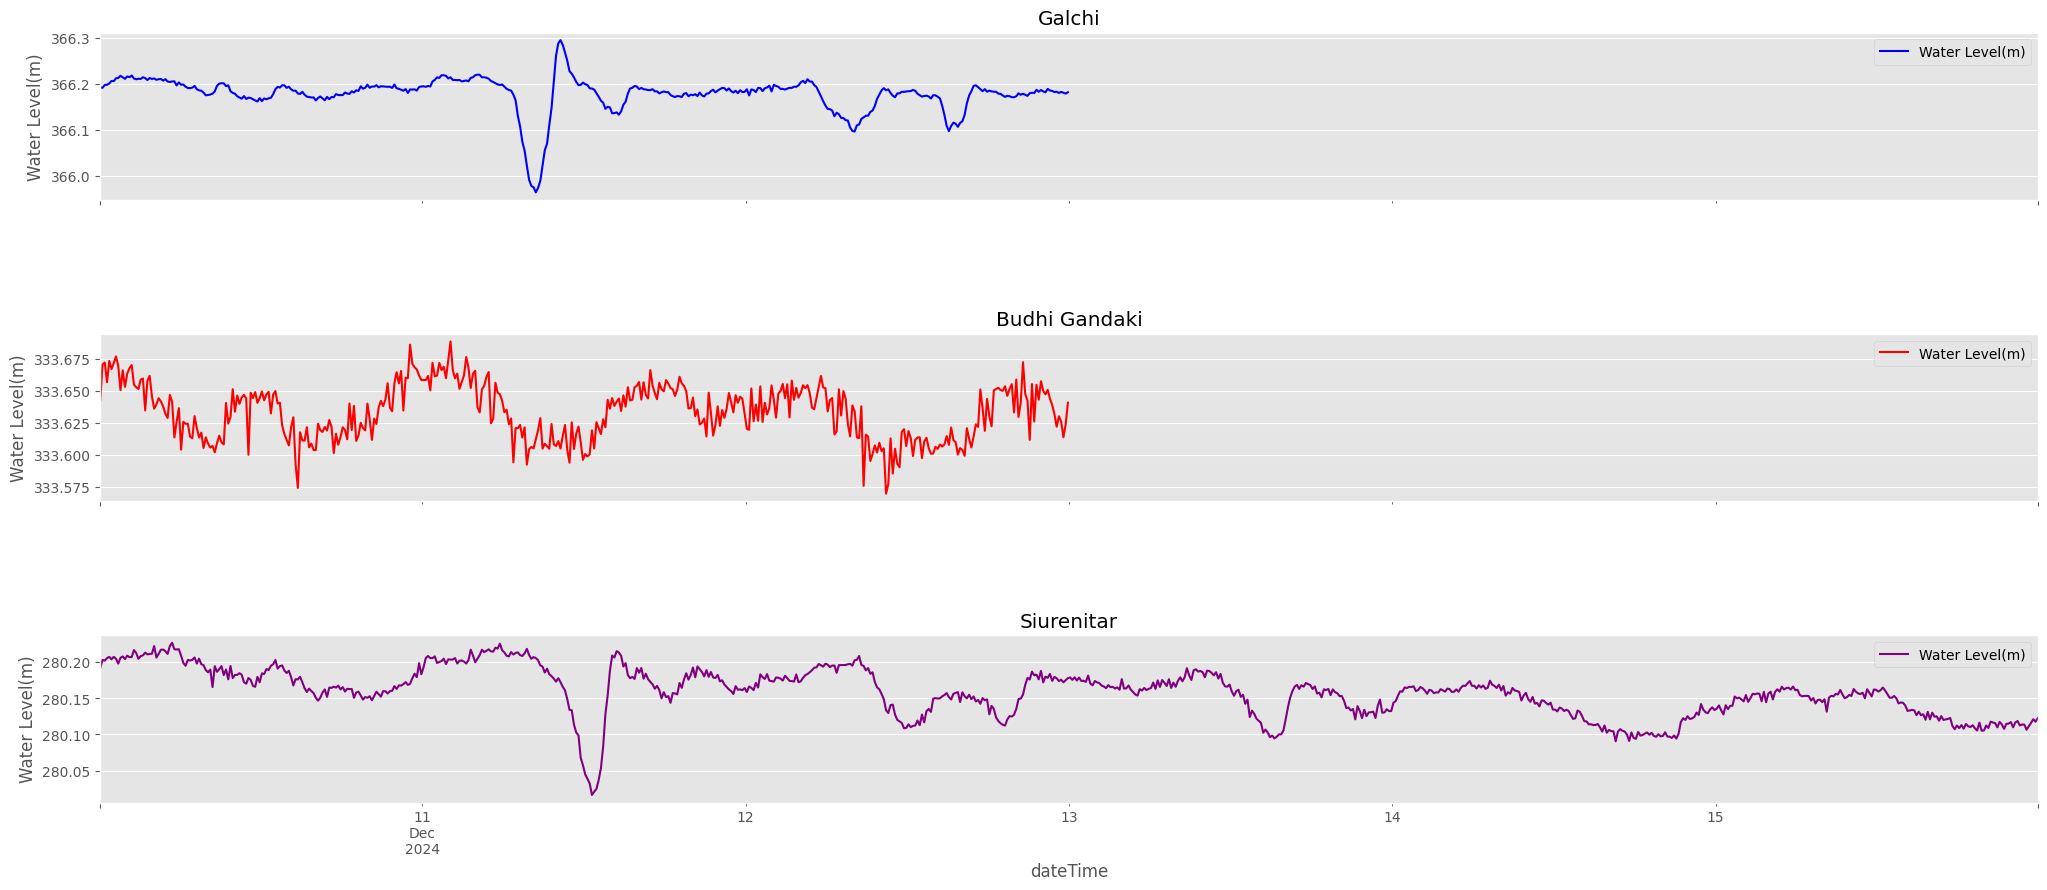

In [27]:
plt.style.use('ggplot')
fig,ax=plt.subplots(3,1,figsize=(25,10),sharex=True)
# min_margin,max_margin=get_plot_bounds(wl_galchi_dec10_dec12['value'])
x_min,x_max,common_xticks=get_plot_bounds_x()

wl_galchi_dec10_dec12.plot(ax=ax[0],color='blue')
ax[0].set_ylabel('Water Level(m)')
ax[0].legend(['Water Level(m)'])
ax[0].set_title('Galchi')

# # Remove preexisting x-ticks and labels
# ax[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax[0].set_xlim(x_min, x_max)
ax[0].set_xticks(common_xticks)
ax[0].set_xticklabels(common_xticks.strftime('%m-%d %H:%M'), rotation=0)



wl_buddhi_dec10_dec12.plot(ax=ax[1],color='red')
ax[1].set_ylabel('Water Level(m)')
ax[1].legend(['Water Level(m)'])
ax[1].set_title('Budhi Gandaki')

wl_siurenitar_dec_10_dec15.plot(ax=ax[2],color='purple')
ax[2].set_ylabel('Water Level(m)')
ax[2].legend(['Water Level(m)'])
ax[2].set_title('Siurenitar')
# ax.set_ylim(min_margin,max_margin)
fig.subplots_adjust(hspace=0.8) 
plt.show()


In [28]:
def calcualte_discharge_galchi(water_level):
    water_level=Decimal(water_level)
    a=Decimal(174.033420951409)
    b=Decimal(1.23635884471447)
    c=Decimal(365.6)
    difference = water_level - c
    power=difference**b
    result=a*power
    return float(result)

In [29]:
def calcualte_discharge_buddhi(water_level):
    water_level=Decimal(water_level)
    a=Decimal(417.1536)
    b=Decimal(0.36303508)
    c=Decimal(333.56)
    difference = water_level - c
    power=difference**b
    result=a*power
    return float(result)

In [30]:
def calcualte_discharge_siurenitar(water_level):
    water_level=Decimal(water_level)
    a=Decimal(657.5618)
    b=Decimal(0.46969843)
    c=Decimal(280)
    difference = water_level - c
    power=difference**b
    result=a*power
    return float(result)

In [31]:
wl_galchi_dec10_dec12['discharge']=wl_galchi_dec10_dec12.apply(lambda row:calcualte_discharge_galchi(row['value']),axis=1)
wl_buddhi_dec10_dec12['discharge']=wl_buddhi_dec10_dec12.apply(lambda row:calcualte_discharge_buddhi(row['value']),axis=1)
wl_siurenitar_dec_10_dec15['discharge']=wl_siurenitar_dec_10_dec15.apply(lambda row:calcualte_discharge_siurenitar(row['value']),axis=1)
wl_galchi_dec10_dec12

,value,discharge
dateTime,,
2024-12-10 00:05:00,366.192383,91.093562
2024-12-10 00:15:00,366.191498,90.925333
2024-12-10 00:25:00,366.197784,92.121625
2024-12-10 00:35:00,366.198090,92.179774
2024-12-10 00:45:00,366.200989,92.732533
...,...,...
2024-12-12 23:15:00,366.180298,88.801527
2024-12-12 23:25:00,366.182678,89.252104
2024-12-12 23:35:00,366.180695,88.876593


In [32]:
def calcualte_mean_velocity_galchi(discharge):
    return 0.002*discharge+1.142

In [33]:
def calcualte_mean_velocity_buddhi(discharge):
    return (0.002851381701*discharge)+0.646

In [34]:
wl_galchi_dec10_dec12['mean_velocity']= calcualte_mean_velocity_galchi(wl_galchi_dec10_dec12['discharge'])
wl_buddhi_dec10_dec12['mean_velocity']= calcualte_mean_velocity_buddhi(wl_buddhi_dec10_dec12['discharge'])
wl_galchi_dec10_dec12

,value,discharge,mean_velocity
dateTime,,,
2024-12-10 00:05:00,366.192383,91.093562,1.324187
2024-12-10 00:15:00,366.191498,90.925333,1.323851
2024-12-10 00:25:00,366.197784,92.121625,1.326243
2024-12-10 00:35:00,366.198090,92.179774,1.326360
2024-12-10 00:45:00,366.200989,92.732533,1.327465
...,...,...,...
2024-12-12 23:15:00,366.180298,88.801527,1.319603
2024-12-12 23:25:00,366.182678,89.252104,1.320504
2024-12-12 23:35:00,366.180695,88.876593,1.319753


In [35]:
wl_galchi_dec10_dec12.to_csv('Dataset/test/wl_galchi.csv',index=True)
wl_buddhi_dec10_dec12.to_csv('Dataset/test/wl_buddhi.csv',index=True)

In [36]:
def calcualte_time(distance,velocity):
    time_delay = distance / (velocity*60)
    # rounded_time_delay = math.floor(time_delay / 10) * 10  
    # # time_period=time_delay//10
    if np.isnan(velocity) or velocity == 0:
        return np.nan  # Return NaN if velocity is invalid
    return time_delay

In [37]:
distance_galchi_siurenitar=30000
distance_buddhi_siurenitar=18500
wl_galchi_dec10_dec12['time_delay']=  wl_galchi_dec10_dec12['mean_velocity'].apply(lambda vel: calcualte_time(distance_galchi_siurenitar, vel))
wl_buddhi_dec10_dec12['time_delay']= wl_buddhi_dec10_dec12['mean_velocity'].apply(lambda vel: calcualte_time(distance_buddhi_siurenitar, vel))
wl_galchi_dec10_dec12


,value,discharge,mean_velocity,time_delay
dateTime,,,,
2024-12-10 00:05:00,366.192383,91.093562,1.324187,377.590139
2024-12-10 00:15:00,366.191498,90.925333,1.323851,377.686104
2024-12-10 00:25:00,366.197784,92.121625,1.326243,377.004746
2024-12-10 00:35:00,366.198090,92.179774,1.326360,376.971690
2024-12-10 00:45:00,366.200989,92.732533,1.327465,376.657746
...,...,...,...,...
2024-12-12 23:15:00,366.180298,88.801527,1.319603,378.901821
2024-12-12 23:25:00,366.182678,89.252104,1.320504,378.643246
2024-12-12 23:35:00,366.180695,88.876593,1.319753,378.858718


Function to Create shifted Df

In [50]:
def create_shifted_df(df):
    shifted_data = [
    {'dateTime': (index + pd.DateOffset(minutes=delay)), 'discharge': discharge}
    for index, delay, discharge in zip(df.index, df['time_delay'], df['discharge'])
]
    return pd.DataFrame(shifted_data)


Creating Shifted Dataframes

In [51]:

shifted_galchi=create_shifted_df(wl_galchi_dec10_dec12)
shifted_buddhi=create_shifted_df(wl_buddhi_dec10_dec12)
shifted_galchi = shifted_galchi.groupby('dateTime', as_index=False)['discharge'].sum()
shifted_buddhi = shifted_buddhi.groupby('dateTime', as_index=False)['discharge'].sum()
print(shifted_galchi.head())
print('--------')
print(shifted_buddhi.head())

                    dateTime  discharge
0 2024-12-10 06:22:35.408336  91.093562
1 2024-12-10 06:32:41.166230  90.925333
2 2024-12-10 06:42:00.284776  92.121625
3 2024-12-10 06:51:58.301401  92.179774
4 2024-12-10 07:01:39.464784  92.732533
--------
                    dateTime   discharge
0 2024-12-10 04:36:04.503653  187.633287
1 2024-12-10 04:38:25.099009  168.934998
2 2024-12-10 04:45:29.933945  188.549377
3 2024-12-10 05:01:49.682386  178.703090
4 2024-12-10 05:04:59.962198  189.346908


In [86]:
# Get the start time (first row in the 'dateTime' column)
start_time = shifted_galchi['dateTime'].min()
# Round the start time to the nearest 5-minute mark
rounded_start_time = start_time - pd.Timedelta(minutes=start_time.minute % 5, 
                                            seconds=start_time.second, 
                                            microseconds=start_time.microsecond)
# Generate a datetime range from the rounded start time with 5-minute intervals
time_range = pd.date_range(rounded_start_time, shifted_galchi['dateTime'].max(), freq='5T')
# Create a new DataFrame with the time_range
df_full = pd.DataFrame({'dateTime': time_range})
# Merge the full time range with the original data
df_galchi_shift_merged = pd.merge_asof(df_full, shifted_galchi.sort_values('dateTime'), on='dateTime', direction='backward')

# Interpolate the 'discharge' values
df_galchi_shift_merged['discharge'] = df_galchi_shift_merged['discharge'].interpolate()
# Fill the NaN value in the first row using forward fill or backward fill
df_galchi_shift_merged['discharge'] = df_galchi_shift_merged['discharge'].fillna(method='bfill')  # Forward fill

df_galchi_shift_merged.set_index('dateTime')
df_galchi_shift_merged

C:\Users\aryan\AppData\Local\Temp\ipykernel_11876\1422812867.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_range = pd.date_range(rounded_start_time, shifted_galchi['dateTime'].max(), freq='5T')
C:\Users\aryan\AppData\Local\Temp\ipykernel_11876\1422812867.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_galchi_shift_merged['discharge'] = df_galchi_shift_merged['discharge'].fillna(method='bfill')  # Forward fill


,dateTime,discharge
0,2024-12-10 06:20:00,91.093562
1,2024-12-10 06:25:00,91.093562
2,2024-12-10 06:30:00,91.093562
3,2024-12-10 06:35:00,90.925333
4,2024-12-10 06:40:00,90.925333
...,...,...
858,2024-12-13 05:50:00,89.252104
859,2024-12-13 05:55:00,88.876593
860,2024-12-13 06:00:00,88.876593
861,2024-12-13 06:05:00,88.536007


In [85]:
# Get the start time (first row in the 'dateTime' column)
start_time = shifted_buddhi['dateTime'].min()
# Round the start time to the nearest 5-minute mark
rounded_start_time = start_time - pd.Timedelta(minutes=start_time.minute % 5, 
                                            seconds=start_time.second, 
                                            microseconds=start_time.microsecond)
# Generate a datetime range from the rounded start time with 5-minute intervals
time_range = pd.date_range(rounded_start_time, shifted_buddhi['dateTime'].max(), freq='5T')
# Create a new DataFrame with the time_range
df_full = pd.DataFrame({'dateTime': time_range})
# Merge the full time range with the original data
df_buddhi_shift_merged = pd.merge_asof(df_full, shifted_buddhi.sort_values('dateTime'), on='dateTime', direction='backward')

# Interpolate the 'discharge' values
df_buddhi_shift_merged['discharge'] = df_buddhi_shift_merged['discharge'].interpolate()
# Fill the NaN value in the first row using forward fill or backward fill
df_buddhi_shift_merged['discharge'] = df_buddhi_shift_merged['discharge'].fillna(method='bfill')  # Forward fill

df_buddhi_shift_merged.set_index('dateTime')
df_buddhi_shift_merged

C:\Users\aryan\AppData\Local\Temp\ipykernel_11876\1661655723.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_range = pd.date_range(rounded_start_time, shifted_buddhi['dateTime'].max(), freq='5T')
C:\Users\aryan\AppData\Local\Temp\ipykernel_11876\1661655723.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_buddhi_shift_merged['discharge'] = df_buddhi_shift_merged['discharge'].fillna(method='bfill')  # Forward fill


,dateTime,discharge
0,2024-12-10 04:35:00,168.934998
1,2024-12-10 04:40:00,168.934998
2,2024-12-10 04:45:00,168.934998
3,2024-12-10 04:50:00,188.549377
4,2024-12-10 04:55:00,188.549377
...,...,...
858,2024-12-13 04:05:00,159.044060
859,2024-12-13 04:10:00,155.591002
860,2024-12-13 04:15:00,155.591002
861,2024-12-13 04:20:00,155.591002


Exportin Galchi and Buddhi changed df

In [87]:
wl_galchi_dec10_dec12.to_csv('Dataset/exported/wl_galchi.csv',index=True)
wl_buddhi_dec10_dec12.to_csv('Dataset/exported/wl_buddhi.csv',index=True)
df_galchi_shift_merged.to_csv('Dataset/exported/shifted_galchi.csv',index=True)
df_buddhi_shift_merged.to_csv('Dataset/exported/shifted_buddhi.csv',index=True)


Joining The time shifted tables and summing discharge

In [88]:
# # Create temporary columns with only hour and minute
# shifted_galchi['dateTime_hm'] = shifted_galchi['dateTime'].dt.strftime('%Y-%m-%d %H:%M')
# shifted_buddhi['dateTime_hm'] = shifted_buddhi['dateTime'].dt.strftime('%Y-%m-%d %H:%M')

# Merge based on the new temporary column
merged_df = pd.merge(
    df_galchi_shift_merged, df_buddhi_shift_merged, 
    on='dateTime',      
    how='outer', 
    suffixes=('_galchi', '_buddhi')
)

# Fill NaN with 0 and add the columns
merged_df['discharge'] = merged_df['discharge_galchi'].fillna(0) + merged_df['discharge_buddhi'].fillna(0)


# merged_df['dateTime'] = pd.to_datetime(merged_df['dateTime_hm'], format='%Y-%m-%d %H:%M')

# # Drop the temporary 'dateTime_hm' column
# merged_df.drop(columns=['dateTime_hm'], inplace=True)

# Set the 'dateTime' column as the index
merged_df.set_index('dateTime', inplace=True)
# Set 'discharge' to NaN if both columns are NaN
for index, row in merged_df.iterrows():
    if pd.isna(row['discharge_galchi']) and pd.isna(row['discharge_buddhi']):
        merged_df.at[index, 'discharge'] = np.nan
        

Checking if summation is correclty functioning:

In [89]:
#merged_df_filtered = merged_df[merged_df['discharge_galchi'].notna() & merged_df['discharge_buddhi'].notna()]
# merged_df_filtered
merged_df
# merged_df.to_csv('Dataset/exported/merged_df.csv',index=True)

,discharge_galchi,discharge_buddhi,discharge
dateTime,,,
2024-12-10 04:35:00,NaN,168.934998,168.934998
2024-12-10 04:40:00,NaN,168.934998,168.934998
2024-12-10 04:45:00,NaN,168.934998,168.934998
2024-12-10 04:50:00,NaN,188.549377,188.549377
2024-12-10 04:55:00,NaN,188.549377,188.549377
...,...,...,...
2024-12-13 05:50:00,89.252104,NaN,89.252104
2024-12-13 05:55:00,88.876593,NaN,88.876593
2024-12-13 06:00:00,88.876593,NaN,88.876593


Creating the Computed Siurenitar Df

In [90]:
computed_siurenitar_df = merged_df[['discharge']]
computed_siurenitar_df

,discharge
dateTime,
2024-12-10 04:35:00,168.934998
2024-12-10 04:40:00,168.934998
2024-12-10 04:45:00,168.934998
2024-12-10 04:50:00,188.549377
2024-12-10 04:55:00,188.549377
...,...
2024-12-13 05:50:00,89.252104
2024-12-13 05:55:00,88.876593
2024-12-13 06:00:00,88.876593


Exporting Computed Siurenitar

In [91]:
computed_siurenitar_df.to_csv('Dataset/exported/computed_siurenitar.csv', index=True)



Visualizing The Computed Siurenitar Df

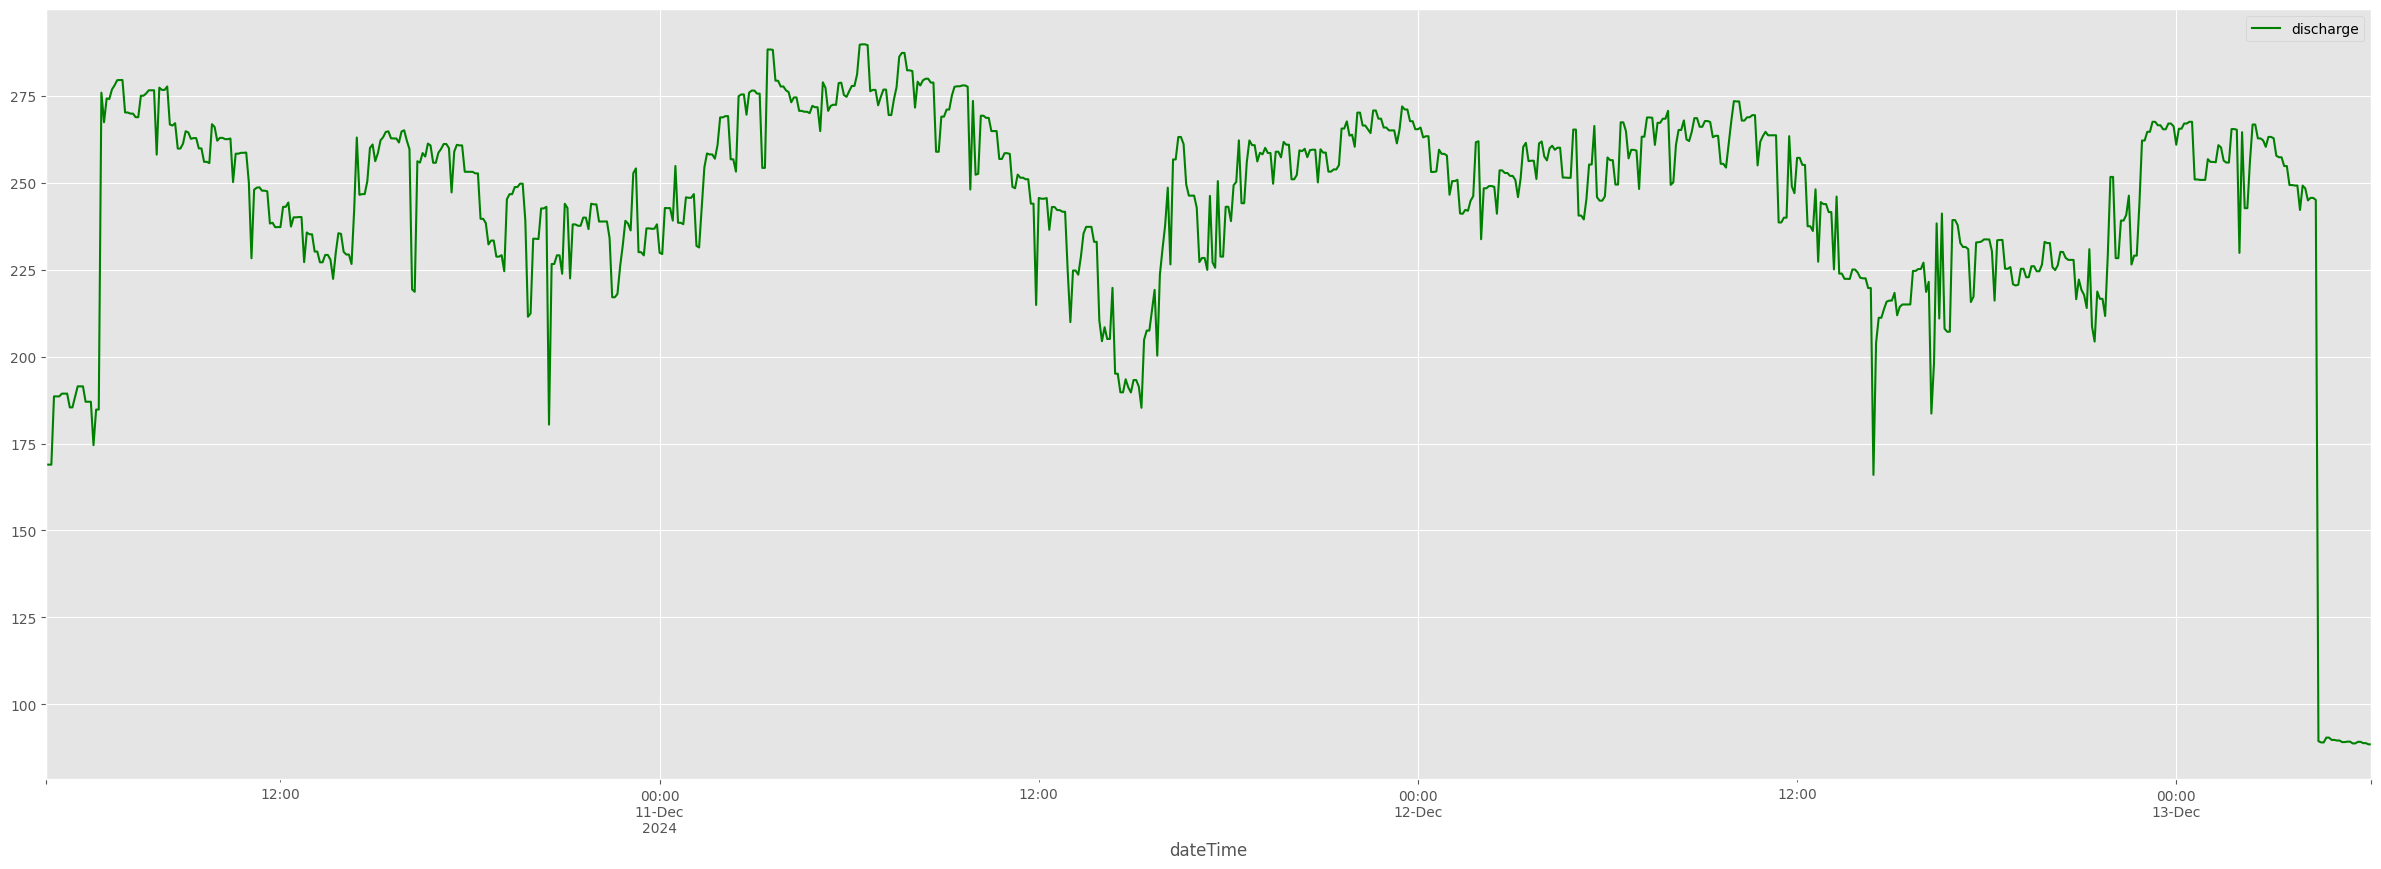

In [92]:
fig,ax=plt.subplots(figsize=(30,10))
min_margin,max_margin=get_plot_bounds(computed_siurenitar_df['discharge'])
computed_siurenitar_df.plot(ax=ax,color='green')
ax.set_ylim(min_margin,max_margin)

plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_11876\4053251500.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_range = pd.date_range('2024-12-10 04:15:00', '2024-12-10 12:05:00', freq='H')


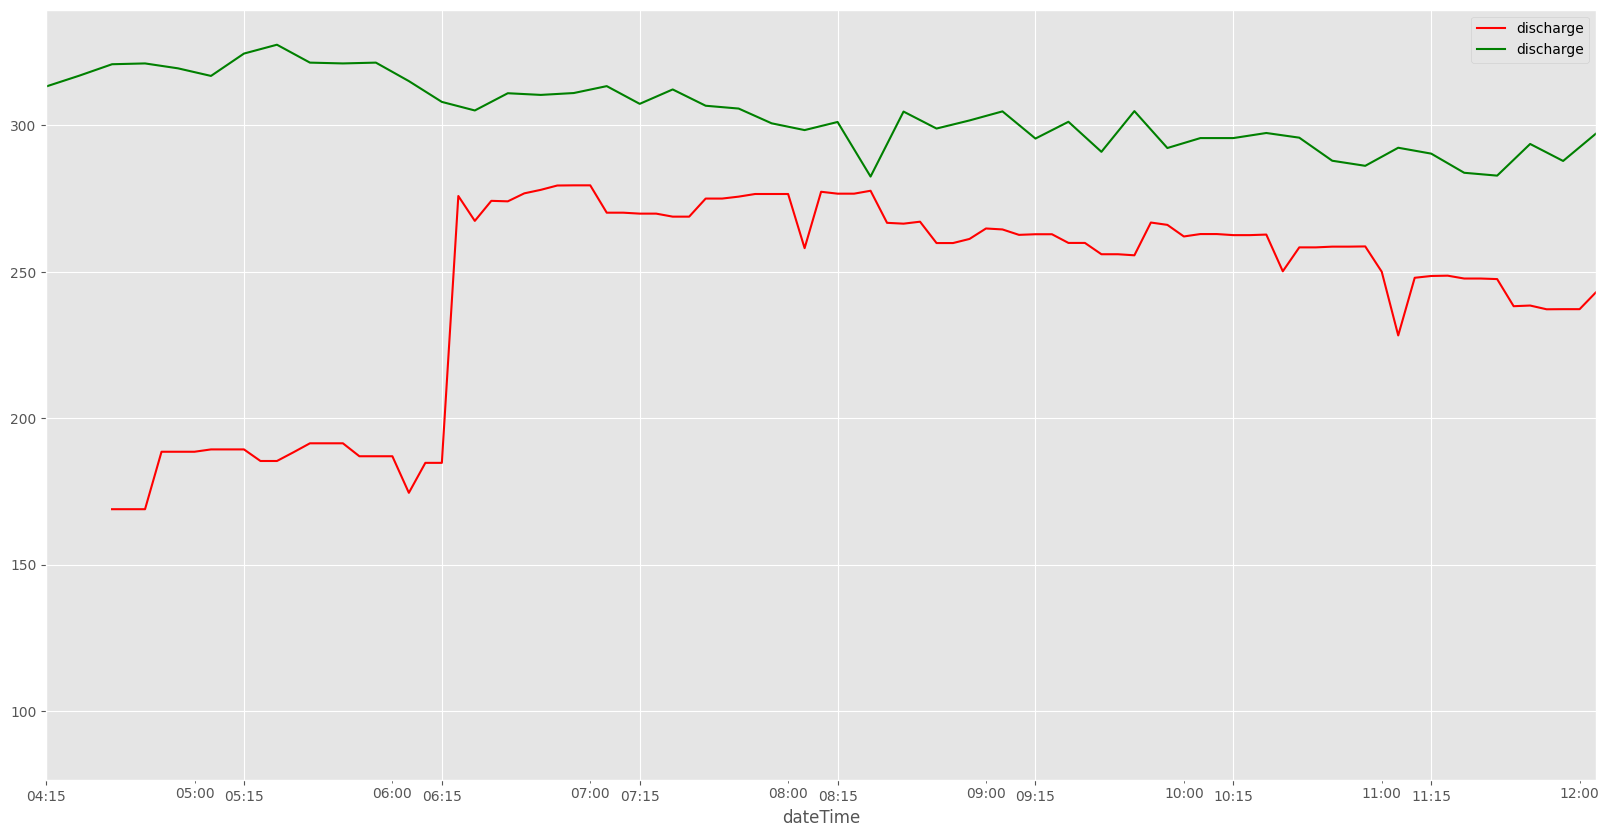

In [93]:
subset_computed_siurenitar=computed_siurenitar_df['2024-12-10':'2024-12-15']
subset_original_siurenitar=wl_siurenitar_dec_10_dec15['2024-12-10':'2024-12-15'][['discharge']]
# Plot both series on the same graph
fig, ax = plt.subplots(figsize=(20, 10))

subset_computed_siurenitar.plot(ax=ax, color='red', label='Computed Siurenitar')
subset_original_siurenitar.plot(ax=ax, color='green', label='Original Siurenitar')

ax.set_xlim(['2024-12-10 04:15:00', '2024-12-10 12:05:00'])

time_range = pd.date_range('2024-12-10 04:15:00', '2024-12-10 12:05:00', freq='H')
ax.set_xticks(time_range) 
ax.set_xticklabels(time_range.strftime('%H:%M'), rotation=0)
# # Adjust the y-axis limits to show both datasets
# y_min = min(subset_computed_siurenitar['discharge'].min(), subset_original_siurenitar['discharge'].min()) - 10
# y_max = max(subset_computed_siurenitar['discharge'].max(), subset_original_siurenitar['discharge'].max()) + 10
# ax.set_ylim([80, 1000])

# ax.legend(['computed','actual'])


# Display the plot
plt.show()

Computing MAE